## 讀取資料

In [1]:
import pandas

In [4]:
news = pandas.read_excel('data/20150628news.xlsx', index_col=0)

In [5]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [6]:
len(news)

147

## 建立詞頻矩陣

In [12]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    description = rec[1]['description']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(description)))
    titles.append(title)
    #print(corpus)
    #break

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [14]:
X

<147x11138 sparse matrix of type '<class 'numpy.int64'>'
	with 22639 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.metrics.pairwise import cosine_distances
n_cosine_similarities = cosine_distances(X)

In [18]:
n_cosine_similarities.shape

(147, 147)

In [73]:
from sklearn import cluster
km = cluster.KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
c = km.fit_predict(n_cosine_similarities)
c

array([0, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2], dtype=int32)

In [74]:
import numpy 
np_titles = numpy.array(titles)
#np_titles

In [75]:
for ele in np_titles[c == 3]:
    print(ele)

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


## 降低維度

In [81]:
?PCA

In [76]:
from sklearn.decomposition import PCA
clf = PCA(n_components= 2)
new_dim = clf.fit_transform(n_cosine_similarities)

In [80]:
new_dim.shape

(147, 2)

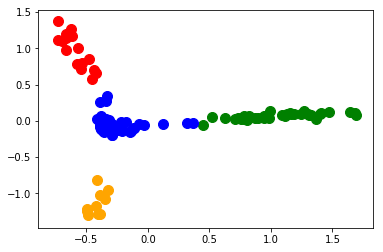

In [77]:
from matplotlib import pyplot as plt
plt.scatter(new_dim[c == 0, 0], new_dim[c == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(new_dim[c == 1, 0], new_dim[c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new_dim[c == 2, 0], new_dim[c == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(new_dim[c == 3, 0], new_dim[c == 3, 1], s = 100, c = 'orange', label = 'Cluster 3')


In [51]:
import numpy
numpy.random.seed(42)
numpy.random.randint(1, 42, 6)

array([39, 29, 15,  8, 21, 39])

In [79]:
a = numpy.array([70,80,90,60,50,80])
b = numpy.array([1 , 1, 1, 2, 2, 1])
a[b == 2]

array([60, 50])